In [322]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))  #Limiting floats output to 3 decimal points
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
lin_model = SGDRegressor()

In [323]:
train = pd.read_csv("train.csv")

In [324]:
test = pd.read_csv("test.csv")

In [325]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


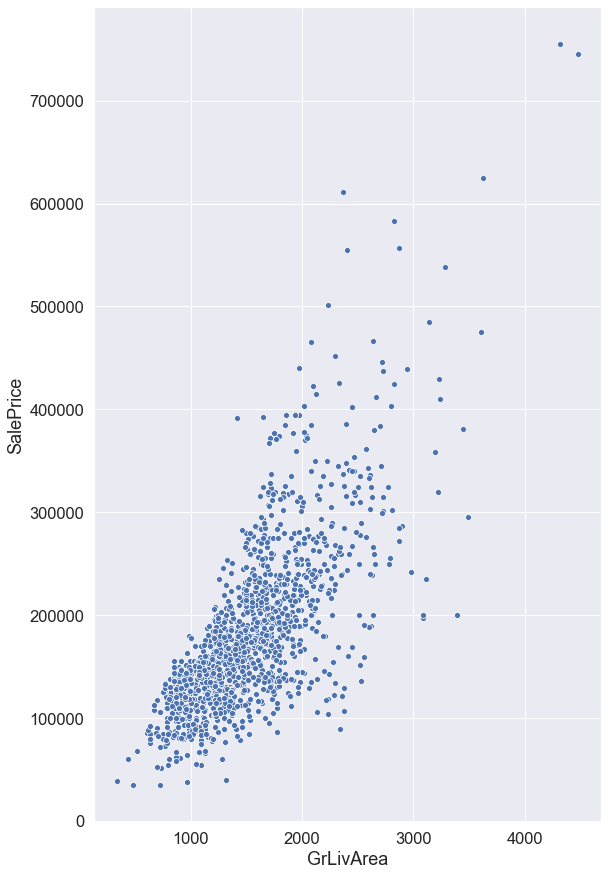

In [326]:
fig = plt.figure(figsize=(20, 15))
sns.set(font_scale=1.5)
train = train.drop(train[(train.GrLivArea>4000) & (train.SalePrice<300000)].index) #Deleting outliers

#Check the graphic again
ax = fig.add_subplot(122)
sns.scatterplot(x =train.GrLivArea, y = train.SalePrice, ax = ax)
plt.show()

In [327]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.000,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.000,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.000,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.000,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.000,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [328]:
train=train.drop(['Id'],axis=1)

In [329]:
test=test.drop(['Id'],axis=1)

In [331]:
train.head(50)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,50,RL,85.000,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,20,RL,75.000,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,60,RL,nan,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,50,RM,51.000,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,190,RL,50.000,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [332]:
train.shape

(1458, 80)

In [333]:
#Exploratory Data Analysis (EDA)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1458 non-null int64
MSZoning         1458 non-null object
LotFrontage      1199 non-null float64
LotArea          1458 non-null int64
Street           1458 non-null object
Alley            91 non-null object
LotShape         1458 non-null object
LandContour      1458 non-null object
Utilities        1458 non-null object
LotConfig        1458 non-null object
LandSlope        1458 non-null object
Neighborhood     1458 non-null object
Condition1       1458 non-null object
Condition2       1458 non-null object
BldgType         1458 non-null object
HouseStyle       1458 non-null object
OverallQual      1458 non-null int64
OverallCond      1458 non-null int64
YearBuilt        1458 non-null int64
YearRemodAdd     1458 non-null int64
RoofStyle        1458 non-null object
RoofMatl         1458 non-null object
Exterior1st      1458 non-null object
Exterior2nd      1458 non-

In [334]:
display(train.describe().transpose())

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1458.000,56.893,42.329,20.000,20.000,50.000,70.000,190.000
LotFrontage,1199.000,69.797,23.203,21.000,59.000,69.000,80.000,313.000
LotArea,1458.000,10459.937,9859.198,1300.000,7544.500,9475.000,11600.000,215245.000
OverallQual,1458.000,6.094,1.376,1.000,5.000,6.000,7.000,10.000
OverallCond,1458.000,5.576,1.113,1.000,5.000,5.000,6.000,9.000
YearBuilt,1458.000,1971.218,30.194,1872.000,1954.000,1972.500,2000.000,2010.000
YearRemodAdd,1458.000,1984.834,20.642,1950.000,1967.000,1994.000,2004.000,2010.000
MasVnrArea,1450.000,102.754,179.442,0.000,0.000,0.000,164.750,1600.000
BsmtFinSF1,1458.000,438.827,432.969,0.000,0.000,382.000,711.000,2188.000
BsmtFinSF2,1458.000,46.613,161.421,0.000,0.000,0.000,0.000,1474.000


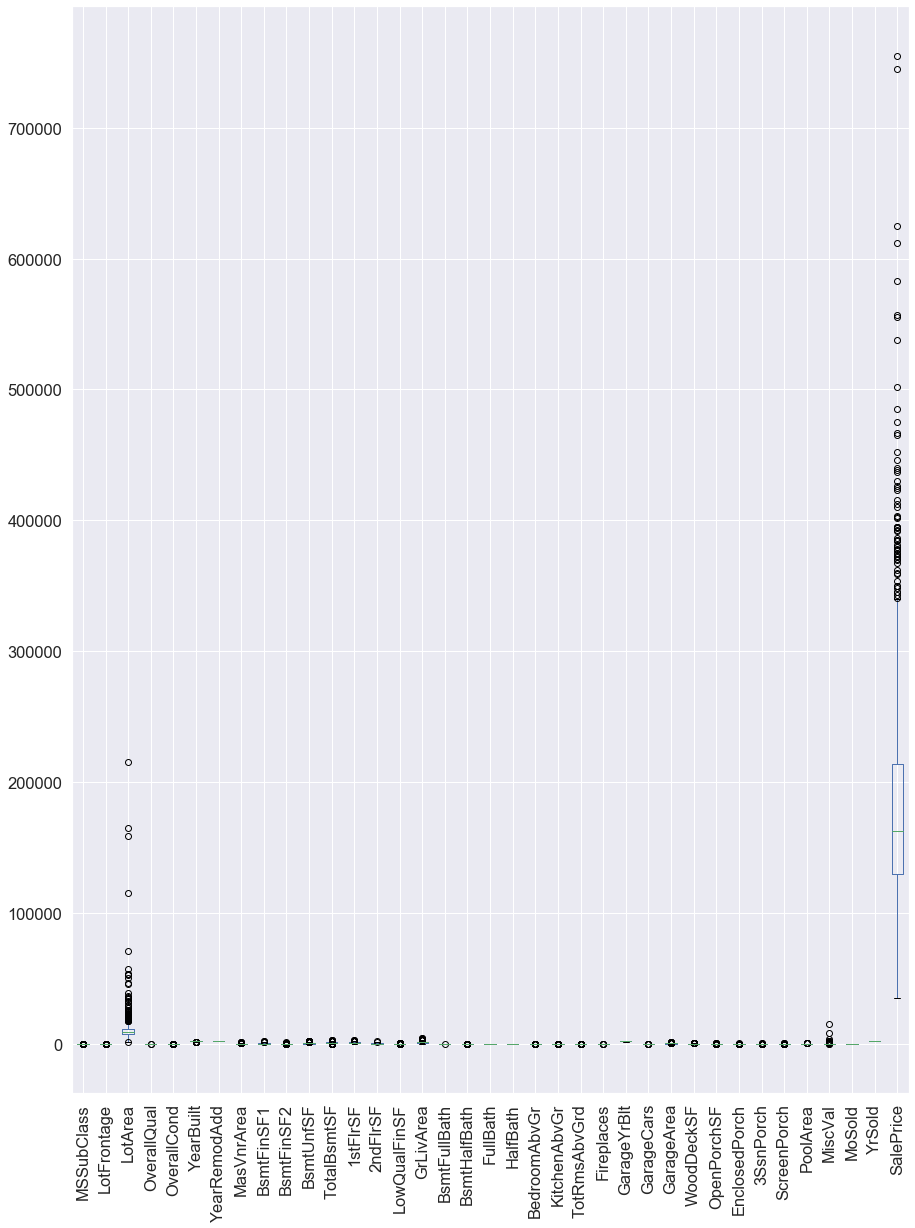

In [335]:
train.boxplot(rot=90,figsize=(15,20))

In [336]:
train.loc[:,["LotArea"]].head()

,LotArea
0,8450
1,9600
2,11250
3,9550
4,14260


In [337]:
#Q1=alldata['LotArea'].quantile(0.25)
#Q3=alldata['LotArea'].quantile(0.75)
#print(Q1)
#print(Q3)
#IQR= Q1-Q3
#print(IQR)
#lower_whisker=Q1-1.5*IQR
#upper_whisker=Q3+1.5*IQR
#print(lower_whisker)
#print(upper_whisker)
#alldata.drop(alldata[(alldata['LotArea']<lower_whisker) & (alldata['LotArea']>upper_whisker)].index,inplace=True)

In [340]:
train.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000,-0.405,-0.142,0.033,-0.059,0.028,0.041,0.023,-0.074,-0.066,...,-0.013,-0.007,-0.012,-0.044,-0.026,0.008,-0.008,-0.014,-0.021,-0.084
LotFrontage,-0.405,1.000,0.389,0.235,-0.056,0.117,0.081,0.164,0.147,0.055,...,0.082,0.117,0.015,0.075,0.046,0.116,0.005,0.026,0.008,0.371
LotArea,-0.142,0.389,1.000,0.091,-0.003,0.007,0.008,0.085,0.175,0.114,...,0.169,0.062,-0.017,0.021,0.045,0.036,0.039,0.006,-0.014,0.268
OverallQual,0.033,0.235,0.091,1.000,-0.090,0.571,0.550,0.403,0.222,-0.058,...,0.237,0.297,-0.113,0.031,0.066,0.045,-0.031,0.073,-0.027,0.796
OverallCond,-0.059,-0.056,-0.003,-0.090,1.000,-0.376,0.075,-0.127,-0.043,0.040,...,-0.003,-0.030,0.070,0.025,0.055,0.002,0.069,-0.004,0.044,-0.078
YearBuilt,0.028,0.117,0.007,0.571,-0.376,1.000,0.592,0.313,0.250,-0.049,...,0.224,0.184,-0.387,0.032,-0.050,-0.005,-0.034,0.013,-0.013,0.524
YearRemodAdd,0.041,0.081,0.008,0.550,0.075,0.592,1.000,0.176,0.123,-0.067,...,0.205,0.223,-0.194,0.046,-0.038,-0.003,-0.010,0.022,0.036,0.508
MasVnrArea,0.023,0.164,0.085,0.403,-0.127,0.313,0.176,1.000,0.239,-0.072,...,0.157,0.105,-0.109,0.020,0.063,-0.021,-0.030,-0.004,-0.007,0.483
BsmtFinSF1,-0.074,0.147,0.175,0.222,-0.043,0.250,0.123,0.239,1.000,-0.050,...,0.205,0.073,-0.104,0.029,0.068,0.053,0.005,-0.004,0.016,0.409
BsmtFinSF2,-0.066,0.055,0.114,-0.058,0.040,-0.049,-0.067,-0.072,-0.050,1.000,...,0.068,0.005,0.036,-0.030,0.089,0.046,0.005,-0.015,0.032,-0.011


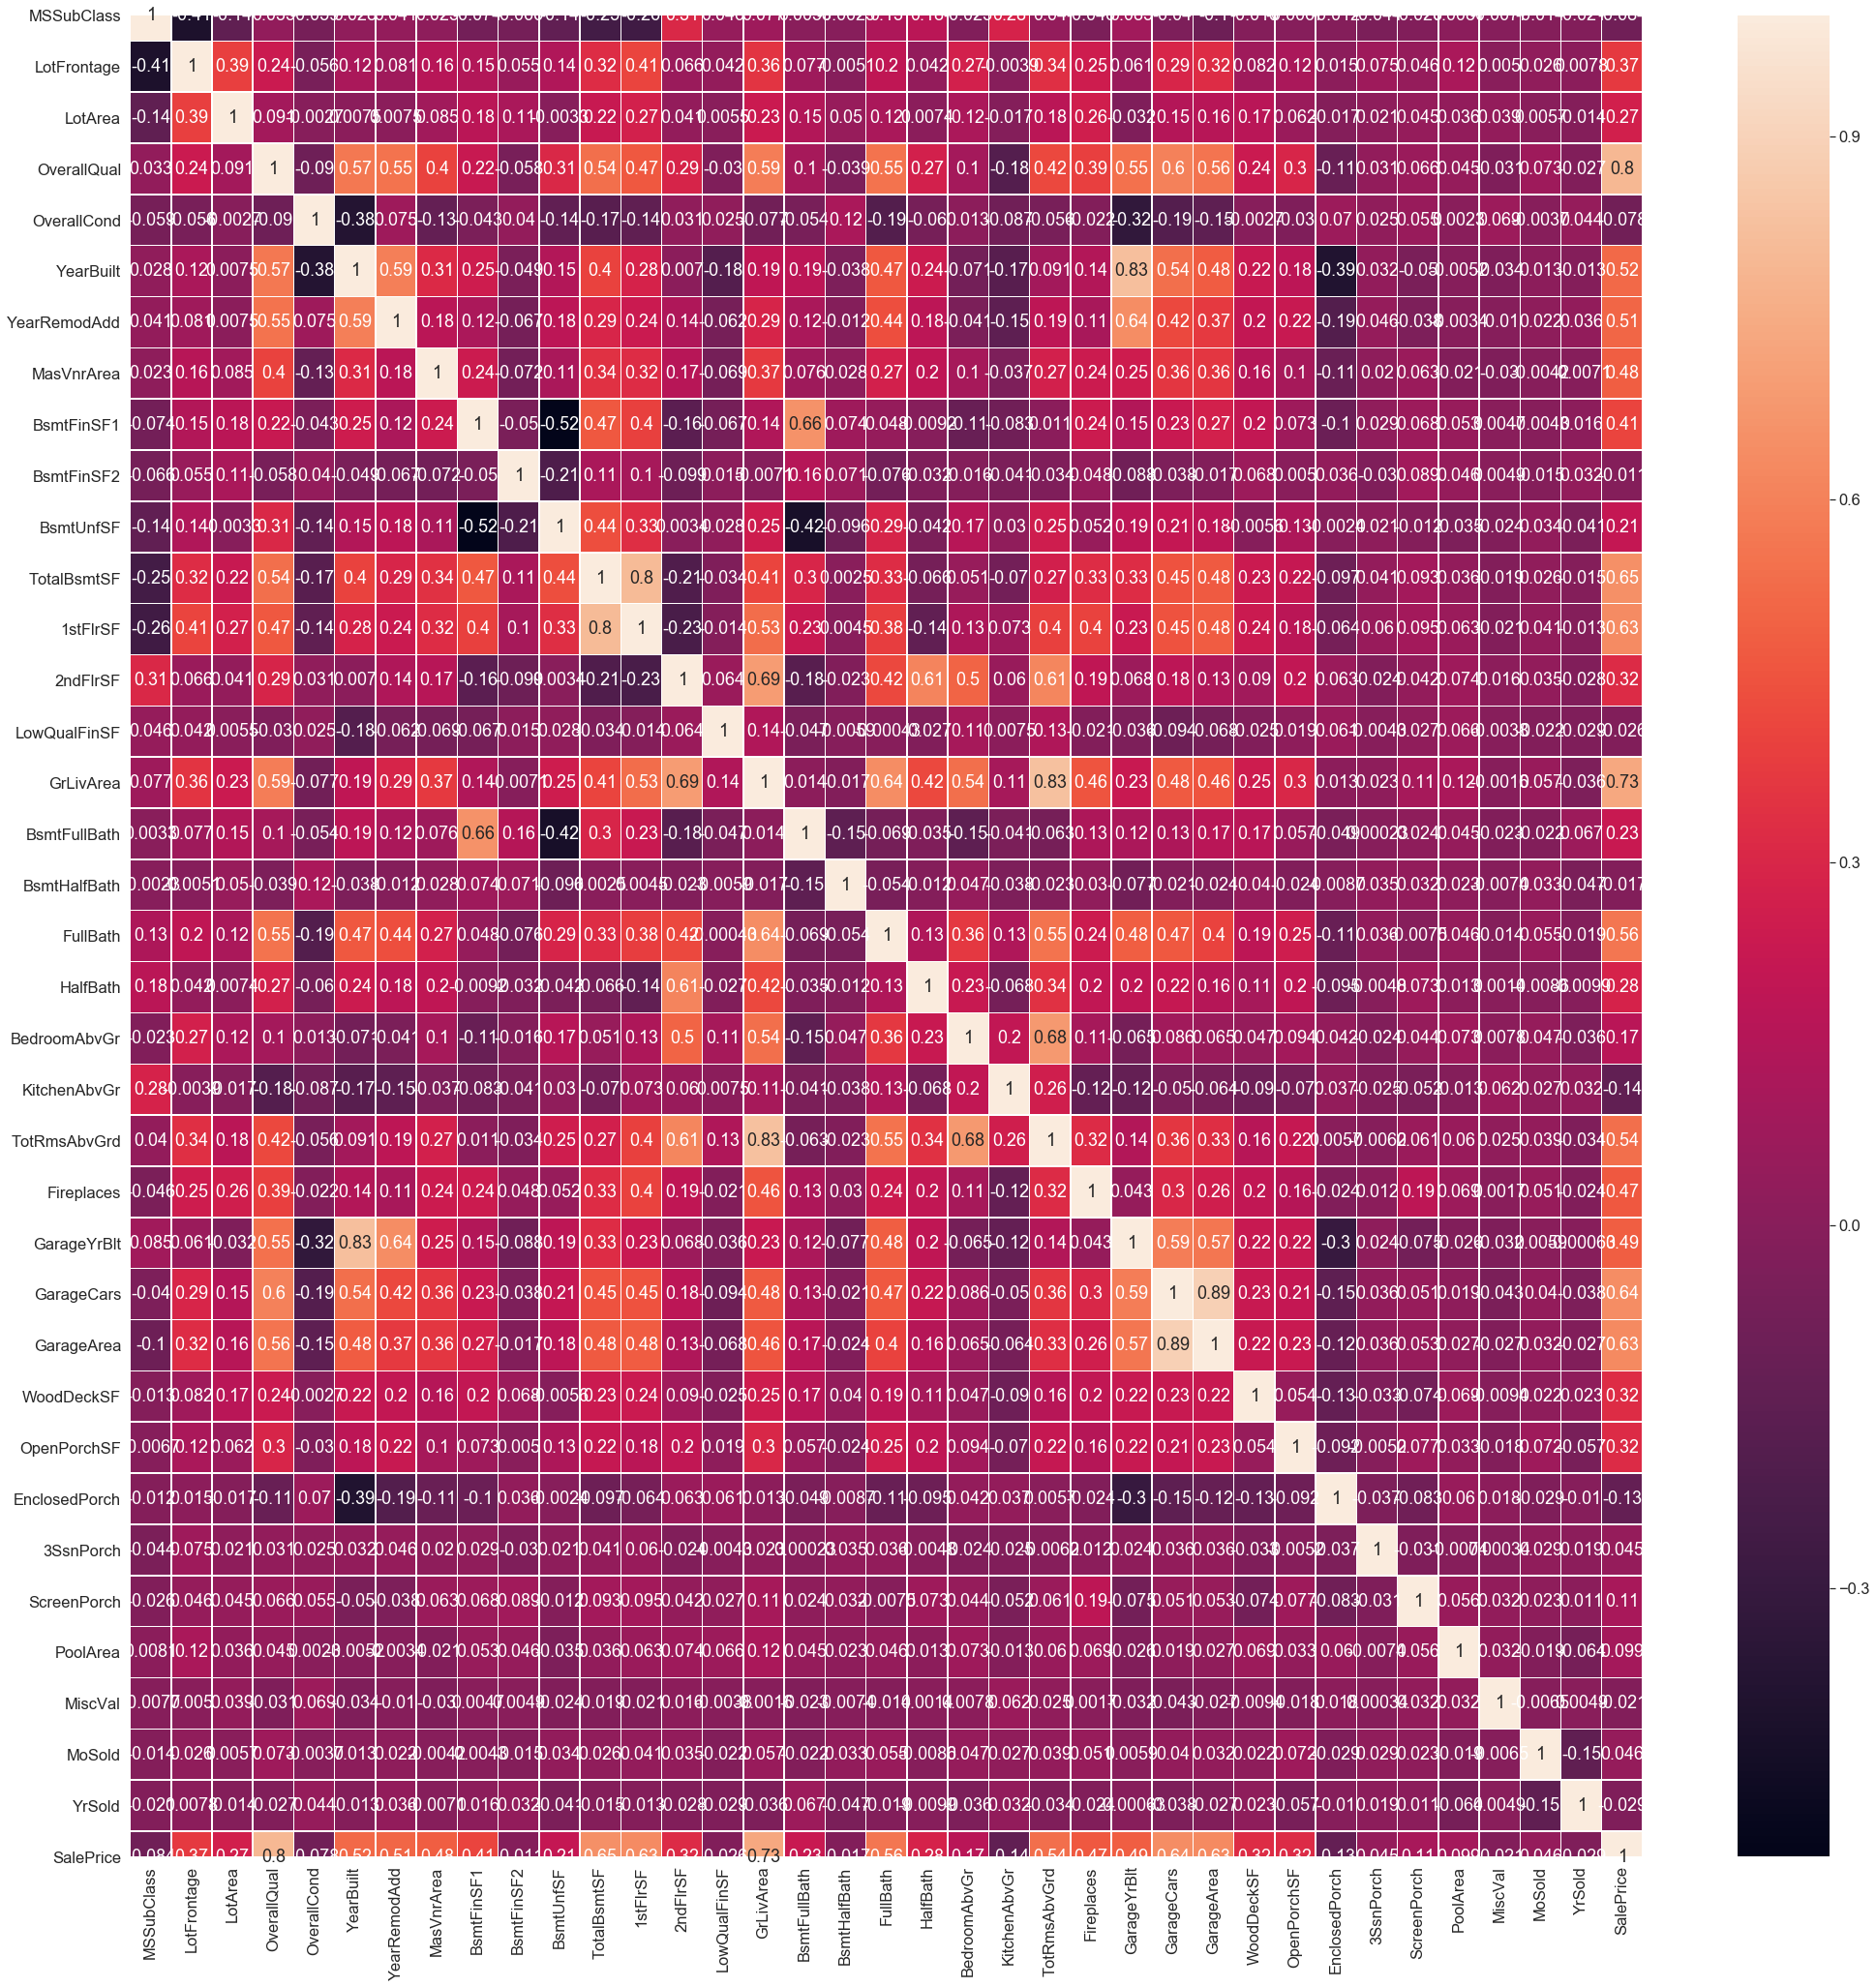

In [341]:
plt.figure(figsize = (35,35))
sns.heatmap(train.corr(),annot=True , linewidths=.5)

In [342]:
train.columns[train.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [343]:
train.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [344]:
# check for missing values
missing=train.isnull().sum()
missing=missing[missing>0]

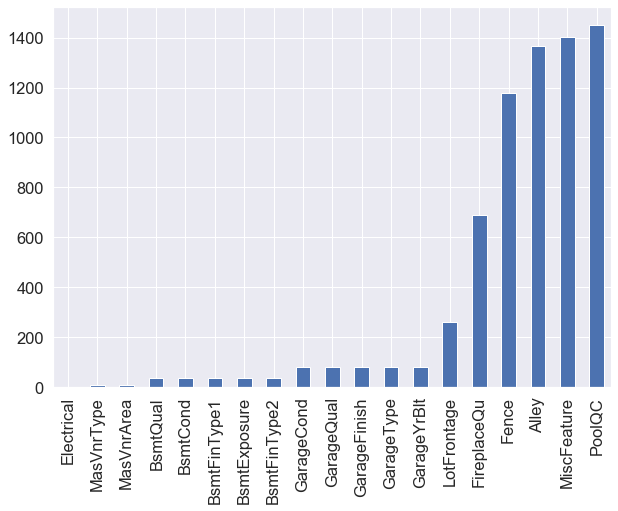

In [345]:
# plot missing values
missing.sort_values(inplace=True)
missing.plot.bar(figsize=(10,7))

In [346]:
len(missing)

19

In [347]:
# filling missing values
train.fillna(train.median(),inplace=True)

In [348]:
# check for missing values
missing=train.isnull().sum()
missing=missing[missing>0]

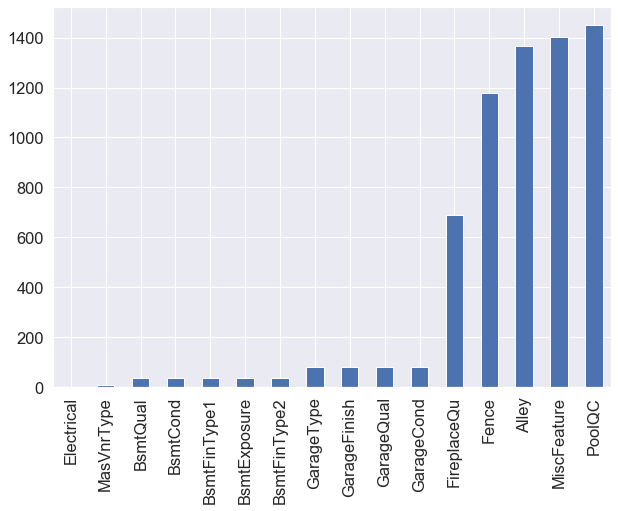

In [349]:
# plot missing values
missing.sort_values(inplace=True)
missing.plot.bar(figsize=(10,7))

In [351]:
df_categorical_features = train.select_dtypes(include=[np.object])
df_categorical_features.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [352]:
# Replace nan with None in these columns
for col in df_categorical_features.columns:
    train[col].fillna('None',inplace=True)

In [353]:
alldata.head(25)

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,None,3,1Fam,TA,No,706.000,0.000,...,WD,0,Pave,8,856.000,AllPub,0,2003,2003,2008
1,1262,0,0,None,3,1Fam,TA,Gd,978.000,0.000,...,WD,0,Pave,6,1262.000,AllPub,298,1976,1976,2007
2,920,866,0,None,3,1Fam,TA,Mn,486.000,0.000,...,WD,0,Pave,6,920.000,AllPub,0,2001,2002,2008
3,961,756,0,None,3,1Fam,Gd,No,216.000,0.000,...,WD,0,Pave,7,756.000,AllPub,0,1915,1970,2006
4,1145,1053,0,None,4,1Fam,TA,Av,655.000,0.000,...,WD,0,Pave,9,1145.000,AllPub,192,2000,2000,2008
5,796,566,320,None,1,1Fam,TA,No,732.000,0.000,...,WD,0,Pave,5,796.000,AllPub,40,1993,1995,2009
6,1694,0,0,None,3,1Fam,TA,Av,1369.000,0.000,...,WD,0,Pave,7,1686.000,AllPub,255,2004,2005,2007
7,1107,983,0,None,3,1Fam,TA,Mn,859.000,32.000,...,WD,0,Pave,7,1107.000,AllPub,235,1973,1973,2009
8,1022,752,0,None,2,1Fam,TA,No,0.000,0.000,...,WD,0,Pave,8,952.000,AllPub,90,1931,1950,2008
9,1077,0,0,None,2,2fmCon,TA,No,851.000,0.000,...,WD,0,Pave,5,991.000,AllPub,0,1939,1950,2008


In [354]:
train.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 80, dtype: int64

In [355]:
train.shape

(1458, 80)

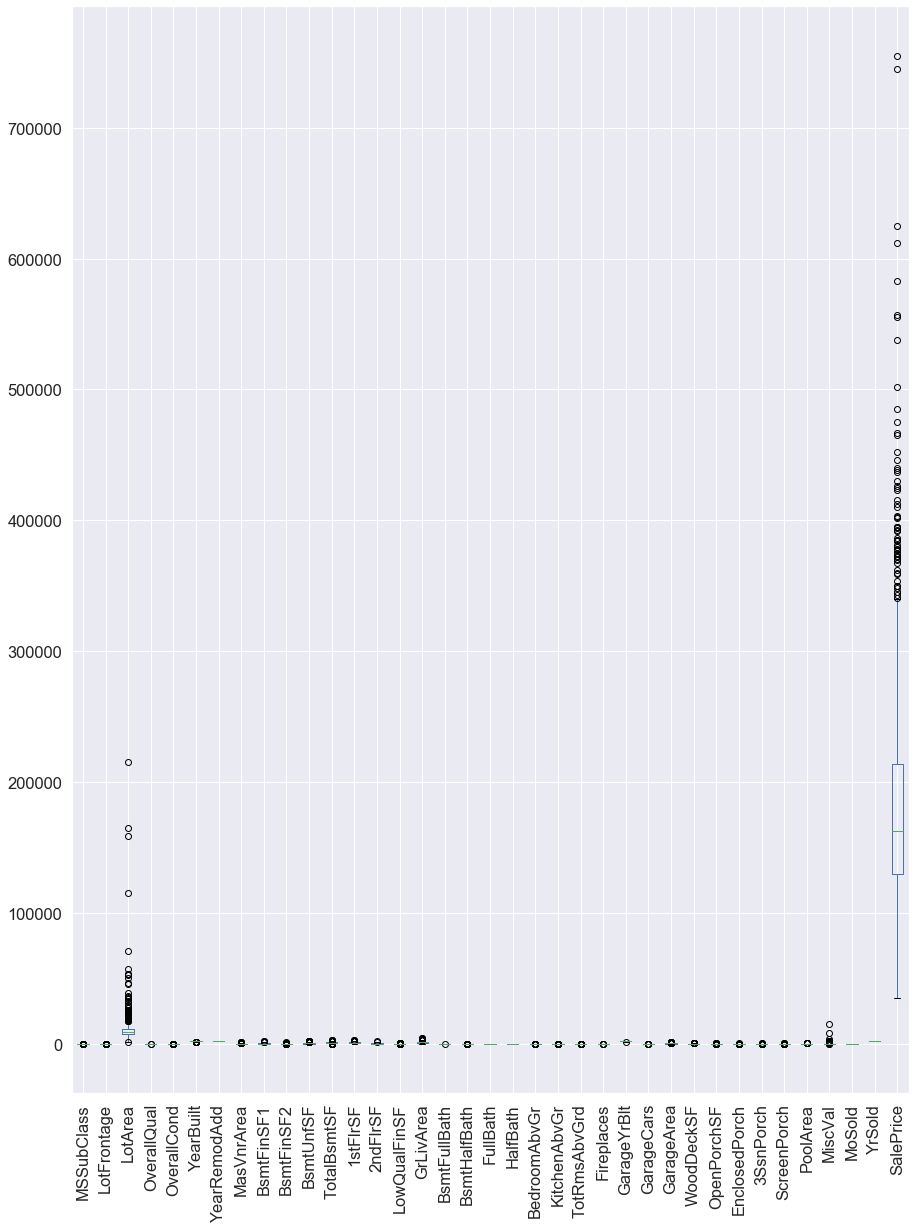

In [356]:
train.boxplot(rot=90,figsize=(15,20))

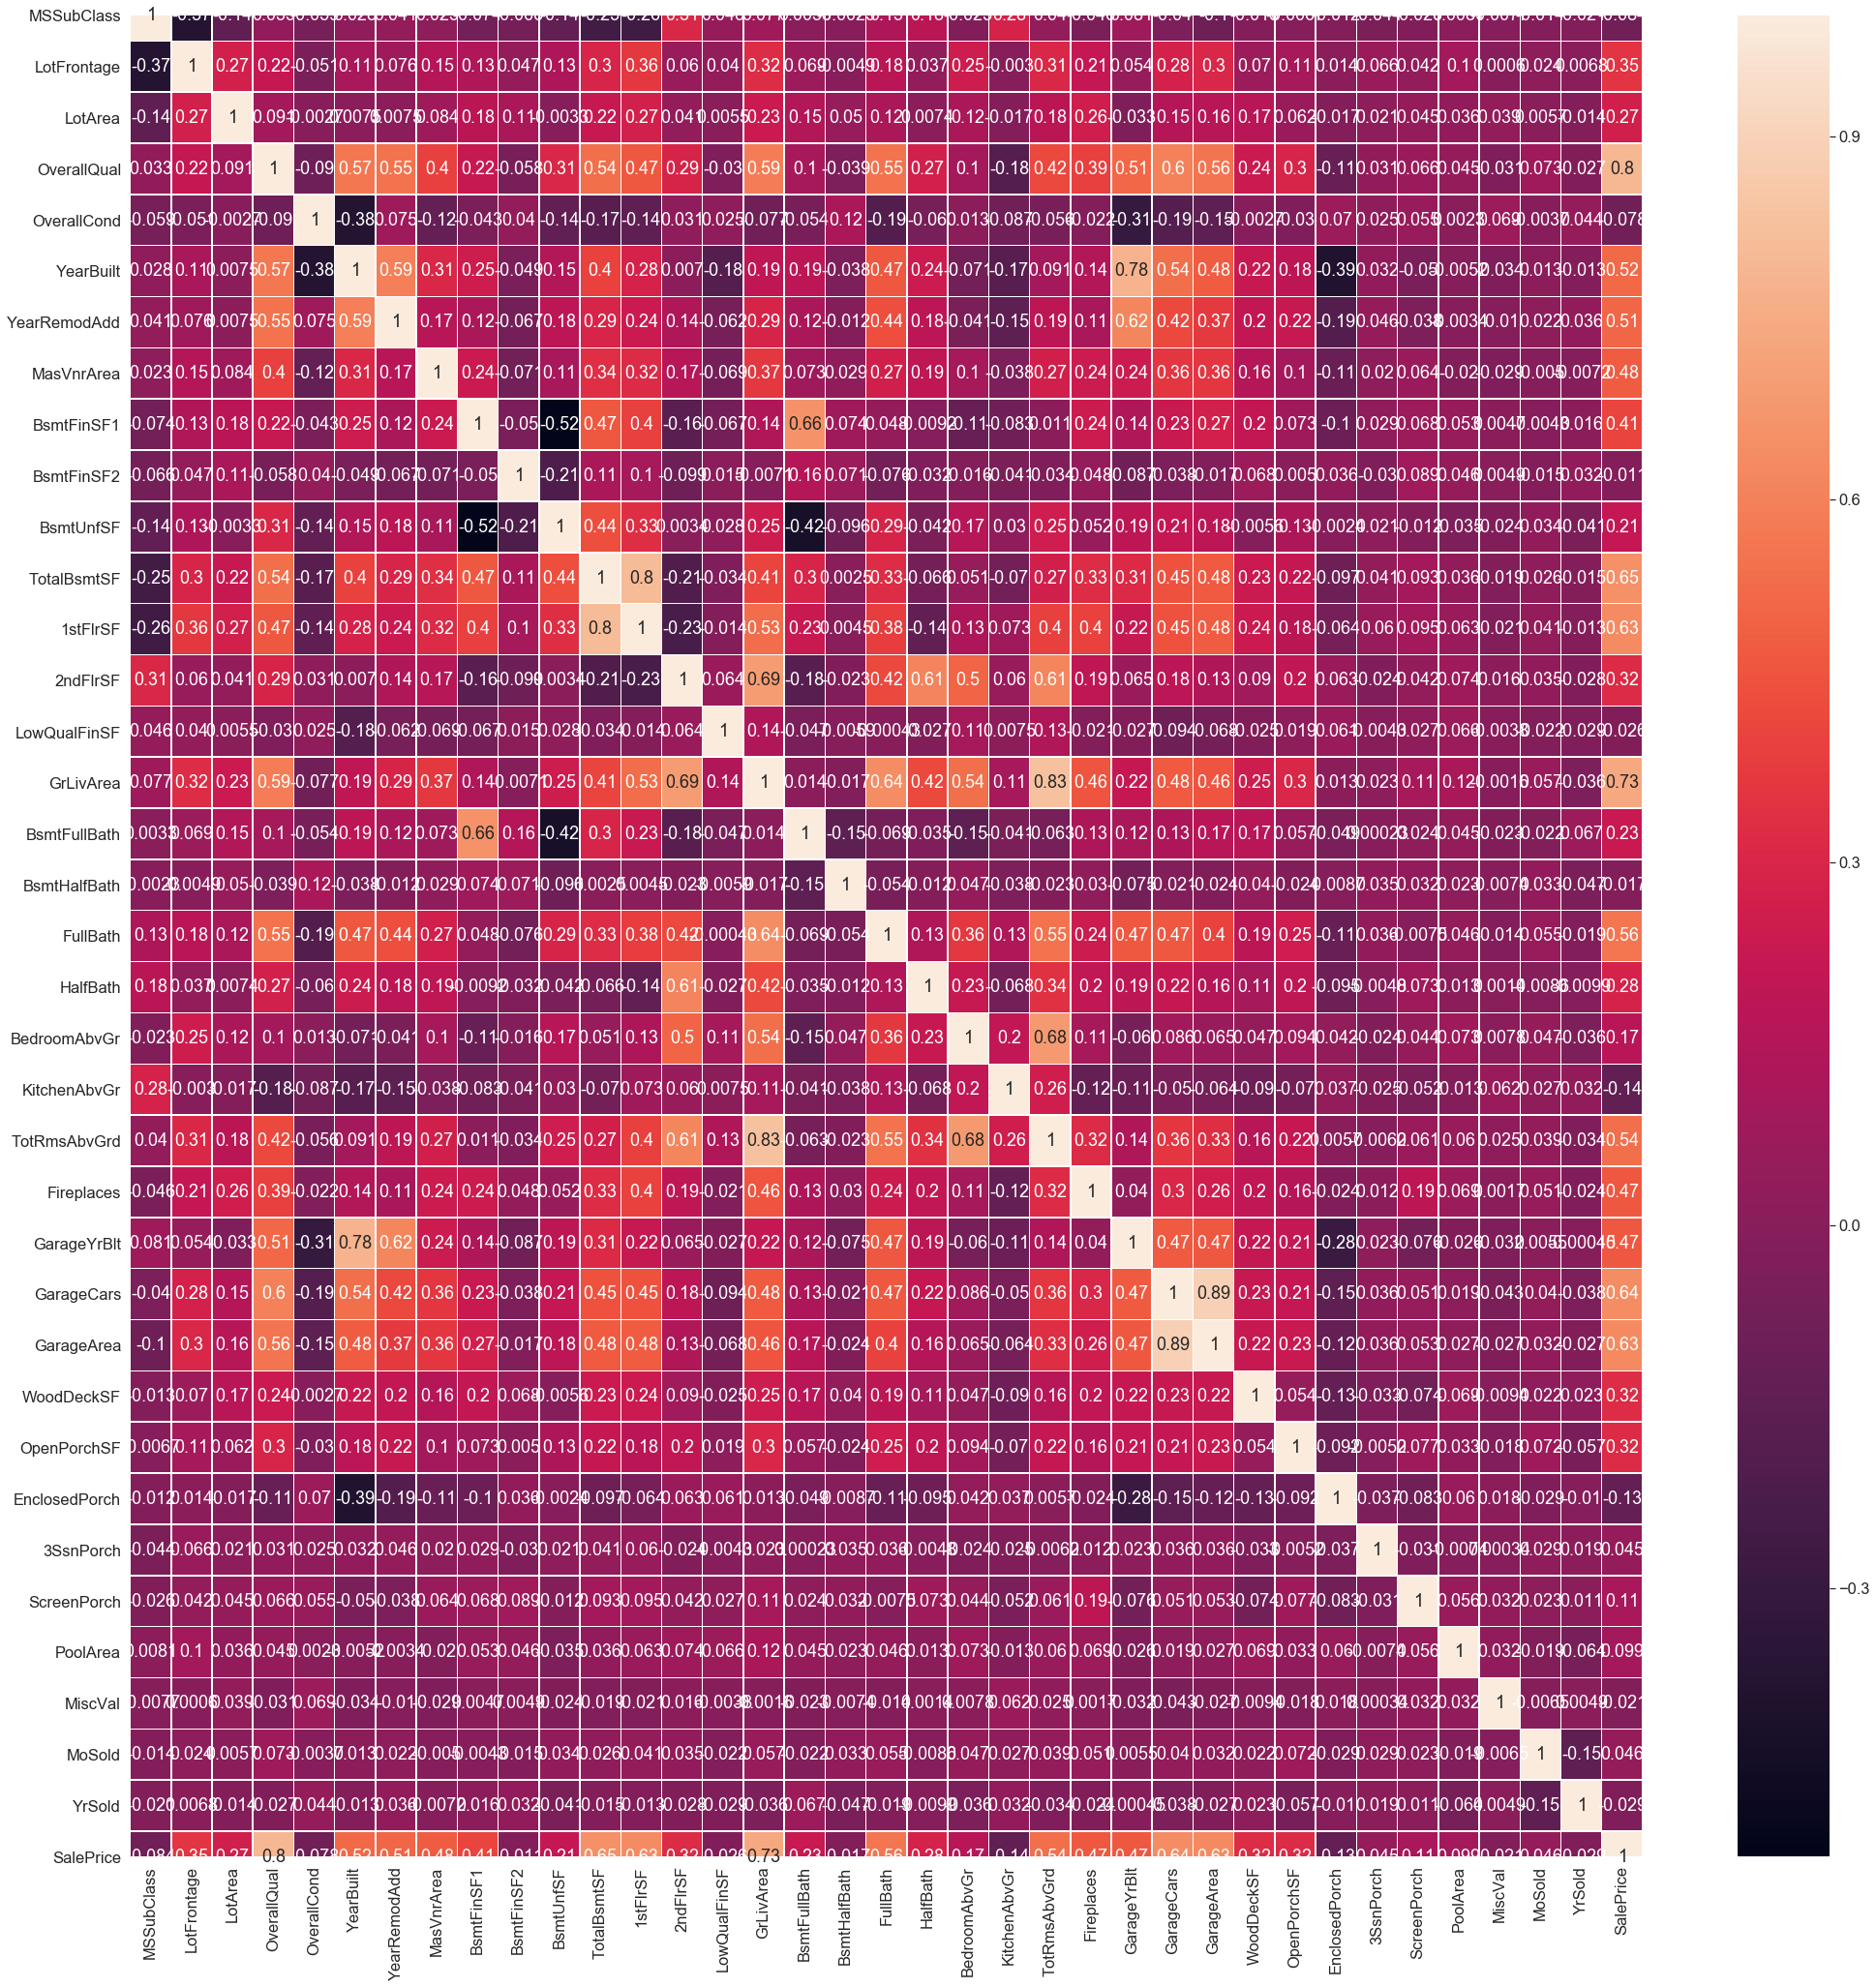

In [357]:
plt.figure(figsize = (35,35))
sns.heatmap(train.corr(),annot=True , linewidths=.5)

In [358]:
df_numeric_features = train.select_dtypes(include=[np.number])
df_numeric_features.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [371]:
df_housingdata_numcols = pd.DataFrame(min_max.fit_transform(df_numeric_features.iloc[:,0:37]),
columns = df_numeric_features.iloc[:,0:37].columns.tolist())

In [372]:
df_housingdata_numcols.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0.235,0.151,0.033,0.667,0.500,0.949,0.883,0.122,0.323,0.000,...,0.000,0.112,0.000,0.000,0.000,0.000,0.000,0.091,0.500,0.241
1,0.000,0.202,0.039,0.556,0.875,0.754,0.433,0.000,0.447,0.000,...,0.348,0.000,0.000,0.000,0.000,0.000,0.000,0.364,0.250,0.204
2,0.235,0.161,0.047,0.667,0.500,0.935,0.867,0.101,0.222,0.000,...,0.000,0.077,0.000,0.000,0.000,0.000,0.000,0.727,0.500,0.262
3,0.294,0.134,0.039,0.667,0.500,0.312,0.333,0.000,0.099,0.000,...,0.000,0.064,0.493,0.000,0.000,0.000,0.000,0.091,0.000,0.146
4,0.235,0.216,0.061,0.778,0.500,0.928,0.833,0.219,0.299,0.000,...,0.224,0.154,0.000,0.000,0.000,0.000,0.000,1.000,0.500,0.299


In [373]:
for col in  df_categorical_features.columns.values:
    one_hot_encoded_variables = pd.get_dummies(df_categorical_features[col],prefix=col)
    df_categorical_features = pd.concat([df_categorical_features,one_hot_encoded_variables],axis=1)
    df_categorical_features.drop([col],axis=1, inplace=True)

In [374]:
df_categorical_features.shape

(1458, 502)

In [375]:
df_housingdata_numcols.shape

(1458, 37)

In [376]:
df_housedata=pd.concat([df_categorical_features,df_housingdata_numcols]).sort_index()

C:\Users\Divnoor Singh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [377]:
df_housedata.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley_Grvl_0,Alley_Grvl_1,Alley_Pave_0,Alley_Pave_1,BedroomAbvGr,BldgType_1Fam_0,BldgType_1Fam_1,...,TotRmsAbvGrd,TotalBsmtSF,Utilities_AllPub_0,Utilities_AllPub_1,Utilities_NoSeWa_0,Utilities_NoSeWa_1,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,nan,nan,nan,1.000,0.000,1.000,0.000,nan,0.000,1.000,...,nan,nan,0.000,1.000,1.000,0.000,nan,nan,nan,nan
0,0.180,0.414,0.000,nan,nan,nan,nan,0.375,nan,nan,...,0.500,0.267,nan,nan,nan,nan,0.000,0.949,0.883,0.500
1,0.321,0.000,0.000,nan,nan,nan,nan,0.375,nan,nan,...,0.333,0.394,nan,nan,nan,nan,0.348,0.754,0.433,0.250
1,nan,nan,nan,1.000,0.000,1.000,0.000,nan,0.000,1.000,...,nan,nan,0.000,1.000,1.000,0.000,nan,nan,nan,nan
2,nan,nan,nan,1.000,0.000,1.000,0.000,nan,0.000,1.000,...,nan,nan,0.000,1.000,1.000,0.000,nan,nan,nan,nan


In [378]:
df_housedata.isnull().sum()

1stFlrSF              1458
2ndFlrSF              1458
3SsnPorch             1458
Alley_Grvl_0          1458
Alley_Grvl_1          1458
                      ... 
Utilities_NoSeWa_1    1458
WoodDeckSF            1458
YearBuilt             1458
YearRemodAdd          1458
YrSold                1458
Length: 539, dtype: int64

In [379]:
df_housedata.fillna(df_housedata.median(), inplace=True)

In [380]:
x=df_housedata.drop(['SalePrice'],axis=1)

In [381]:
y=df_housedata['SalePrice']

In [382]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=0)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(2332, 538) (584, 538) (2332,) (584,)


In [383]:
df_housedata.shape

(2916, 539)

In [384]:
X_train.isnull().sum()

1stFlrSF              0
2ndFlrSF              0
3SsnPorch             0
Alley_Grvl_0          0
Alley_Grvl_1          0
                     ..
Utilities_NoSeWa_1    0
WoodDeckSF            0
YearBuilt             0
YearRemodAdd          0
YrSold                0
Length: 538, dtype: int64

In [385]:
df_housedata.isnull().sum()

1stFlrSF              0
2ndFlrSF              0
3SsnPorch             0
Alley_Grvl_0          0
Alley_Grvl_1          0
                     ..
Utilities_NoSeWa_1    0
WoodDeckSF            0
YearBuilt             0
YearRemodAdd          0
YrSold                0
Length: 539, dtype: int64

In [386]:
lin_model.fit(X_train,Y_train)
lin_model_predictions = lin_model.predict(X_test)
print(lin_model.score(X_test,Y_test))

0.7489389081359861
